In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm, invgamma
np.set_printoptions(threshold=np.inf)

Suppose we have some raw data for which we model using:
$$ Y_1, ..., Y_n\mid\mu, \sigma^2  \sim \text{Normal}(\mu, \sigma^2) $$

Where we have our parameters distributed by some distributions below:

$$ \mu\sim \text{Normal}(v, \phi_0^2) \quad \sigma^2 \sim \text{Inv}(a, b) $$

Where $\mu_0$, $a$, $b$, $\sigma_0^2$ are fixed constants

# Priors

In [2]:
a, b = 2, 0
v, phi = 0, 2

In [3]:
u = norm.rvs(v, phi)
s = invgamma.rvs(a, b)

In [4]:
y = norm.rvs(u, pow(s, 0.5), 50)

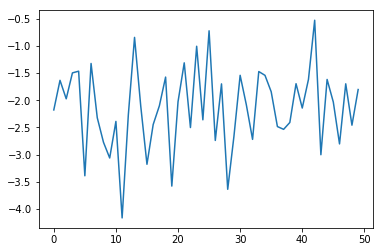

In [5]:
plt.plot(y)
plt.show()

In [6]:
u_grid = np.linspace(-5,5, 21)
s_grid = np.linspace(0,1.5,21)

prior_u = np.array([norm.pdf(u_grid,v, phi)])
prior_s = np.array([invgamma.pdf(s_grid, a, b)])

prior = np.outer(prior_u, prior_s)

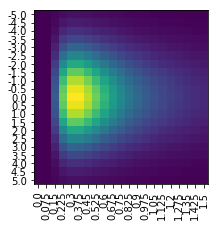

In [7]:
fig = plt.figure(figsize=(10, 3.2))
ax = fig.add_subplot(111)
ax.set_xticklabels(s_grid)
plt.xticks(range(len(s_grid)), rotation = 90)
ax.set_yticklabels(u_grid)
plt.yticks(range(len(u_grid)))
plt.imshow(prior)
plt.show()

In [8]:
np.shape(prior)

(21, 21)

# Likelihood

Now we have a matrix showing us the prior probability of that combination of $\mu$ and $\sigma^2$, we create  a likelihood function which computed the probability that our data was drawn from a Normal distribution with the specified parameters.

$$ \text{P}(Y_i = y_i \mid \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left\{-\frac{(y_i - \mu)^2}{2 \sigma^2}\right\} $$ 

In [9]:
def likelihood(y_val, u_val, s_val):
    return norm.pdf(y_val, u_val, s_val)

# Everything above this is setup, the answer to your question lies here:
lik_fn = np.vectorize(likelihood)

# Posterior

In [10]:
for y_val in y:
    lik_mat = np.zeros((len(u_grid),len(s_grid)))
    for i in range(len(u_grid)):
        for j in  range(len(s_grid)):
            lik_mat[i,j] = likelihood(y_val, u_grid[i], pow(s_grid[j], 0.5))
            lik_mat = np.nan_to_num(lik_mat)
    post_mat = (lik_mat @ prior) / np.nan_to_num(sum(lik_mat @ prior))
    post_mat = np.nan_to_num(post_mat)
    prior = post_mat

C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1649: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


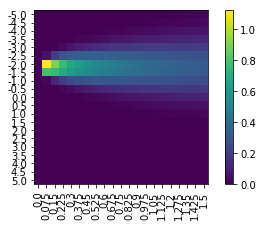

In [11]:
fig = plt.figure(figsize=(6, 3.2))
ax = fig.add_subplot(111)
plt.imshow(lik_mat)
plt.colorbar(orientation='vertical')
ax.set_xticklabels(s_grid)
plt.xticks(range(len(s_grid)), rotation = 90)
ax.set_yticklabels(u_grid)
plt.yticks(range(len(u_grid)))

plt.show()

In [12]:
u

-2.1463422566024928

In [13]:
s

0.5012051161970752

In [25]:
np.shape(lik_mat @ prior)

(21, 21)

In [15]:
for row in lik_mat:
    print(row)

[  0.00000000e+00   1.07707468e-76   8.85722399e-39   3.52999644e-26
   6.75407741e-20   3.86961456e-16   1.21837657e-13   7.32747226e-12
   1.56834910e-10   1.68749826e-09   1.12270607e-08   5.26830542e-08
   1.90338953e-07   5.62557230e-07   1.42029089e-06   3.16173085e-06
   6.35511760e-06   1.17449993e-05   2.02411768e-05   3.28928015e-05
   5.08519669e-05]
[  0.00000000e+00   1.42904027e-62   1.02022733e-31   1.80041996e-21
   2.29226961e-16   2.58361287e-13   2.75157474e-11   7.62951353e-10
   9.13676742e-09   6.25810987e-08   2.90098803e-07   1.01288871e-06
   2.86040523e-06   6.86334512e-06   1.44926777e-05   2.76340670e-05
   4.85063401e-05   7.95437127e-05   1.23263837e-04   1.82140304e-04
   2.58492346e-04]
[  0.00000000e+00   6.76386369e-50   2.21958685e-25   3.02290114e-17
   3.38106322e-13   8.85640594e-11   3.56538455e-09   4.93438027e-08
   3.50902423e-07   1.60248224e-06   5.37107201e-06   1.43829552e-05
   3.25604273e-05   6.47958819e-05   1.16551138e-04   1.93399271e

In [20]:
norm.pdf(y[0], u_grid[1], pow(s_grid[-1], 0.5))

3.678821208359513e-08

In [17]:
u_grid[-1]

5.0

In [20]:
lik_mat

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.45425428e-60,   1.78105548e-47,   1.51810713e-36,
          4.61614157e-27,   5.00734536e-19,   1.93770517e-12,
          2.67497408e-07,   1.31735610e-03,   2.31440053e-01,
          1.45052621e+00,   3.24313008e-01,   2.58675253e-03,
          7.36032727e-07,   7.47121259e-12,   2.70543304e-18,
          3.49489565e-26,   1.61058393e-35,   2.64779428e-46,
          1.55287623e-58,   3.24893613e-72,   2.42491898e-87],
       [  2.33011213e-30,   3.60174899e-24,   1.05154032e-18,
          5.79848154e-14,   6.03918720e-10,   1.18800582e-06,
      